# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.7.0
cachetools                   5.3.2
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
Flask                        3.0.2
flatbuffers                  23.5.26
fonttools                    4.48.1
gast                         0.5.4
google-auth                  2.27.0
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.1
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.1
ipytho


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os


In [4]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [5]:
# it gives us the content inside the folder
os.listdir('data/happy/')

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [6]:
gpus= tf.config.experimental.list_physical_devices('CPU')

In [7]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
len(gpus)

1

In [9]:
# Avoid OOM(uot of memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [11]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
 # cv2 is used for image manipulation, object detection, feature extraction, camera calibration, and more
import cv2
import imghdr

C:\Users\nikhi\AppData\Local\Temp\ipykernel_9672\3907510148.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [13]:
data_dir = 'data' 

In [14]:
# folder
os.listdir(data_dir)

['happy', 'sad']

In [15]:
# sub folder
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [16]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir): # to folder
    for image in os.listdir(os.path.join(data_dir, image_class)): # to sub-folder
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [18]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [19]:
for image_class in os.listdir(data_dir): # to folder
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
60632274._UY200_.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_6

In [20]:
image= cv2.imread(os.path.join('data','happy','7-Habits-of-Happy-People-image.jpeg'))
# for reading the image

In [21]:
image.shape

(894, 1280, 3)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

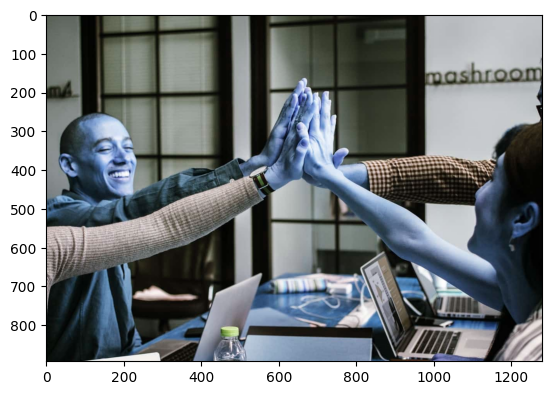

In [23]:
plt.imshow(image)
plt.show()
# for showing the image

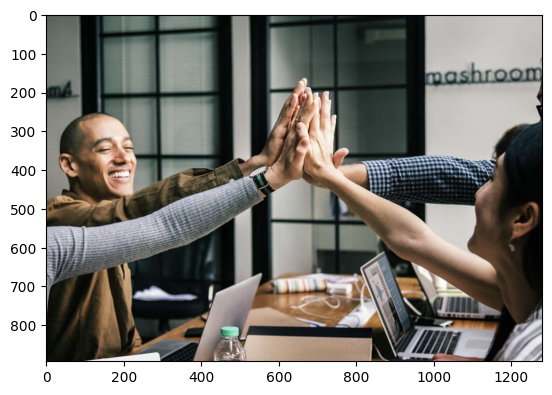

In [24]:
#natural colours
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 3. Load Data

In [25]:
# buliding data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


### By default, image_dataset_from_directory performs the following:

Rescales the pixel values of images to be in the range [0, 1].         
Resizes the images to a standard size (default is 256x256 pixels).      
Shuffles the data.      
Splits the data into training and validation sets

In [26]:
# loop through data pipeline
data_iterator = data.as_numpy_iterator()

In [27]:
# access data pipeline
batch = data_iterator.next()

In [28]:
batch

(array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.5500

In [29]:
len(batch)

2

In [30]:
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]# 1,0 happy sad

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [32]:
batch[1].shape


(32,)

### 1- SAD
### 0- HAPPY

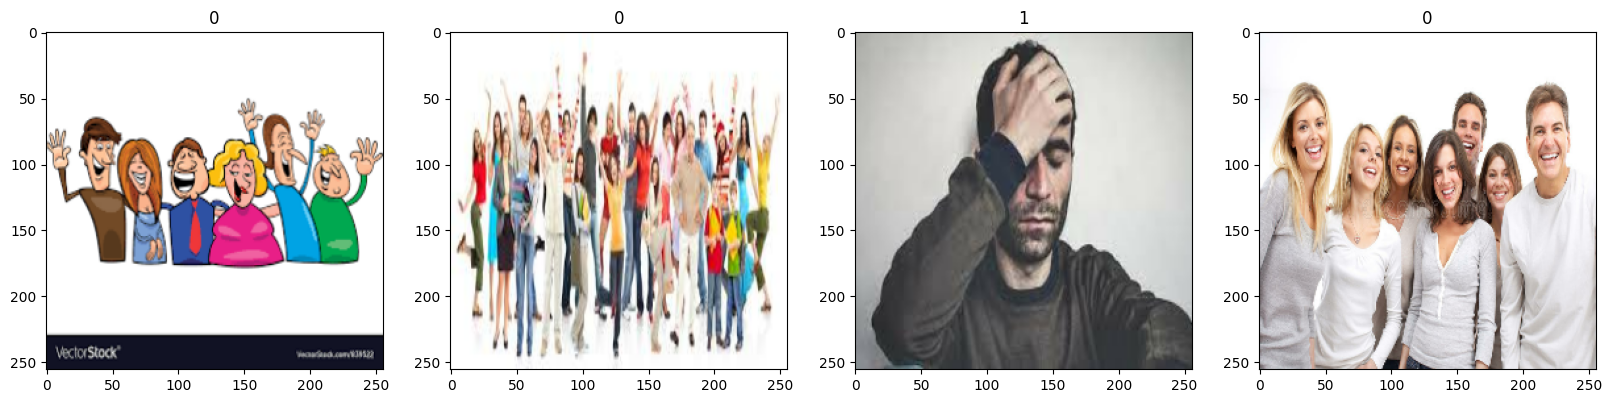

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

The lambda function takes each pair of values (x, y) and returns a new pair where x is divided by 255, and y remains unchanged.

In [34]:
# x-images y-labels
# map- to process and transform input data

data = data.map(lambda x,y: (x/255, y))

In [35]:
data.as_numpy_iterator().next()

(array([[[[0.54799515, 0.55975986, 0.5166226 ],
          [0.55464345, 0.56640816, 0.5232709 ],
          [0.5629902 , 0.5747549 , 0.53161764],
          ...,
          [0.34515738, 0.35029298, 0.29567248],
          [0.3006836 , 0.30852672, 0.25754634],
          [0.34730393, 0.35514706, 0.30416667]],
 
         [[0.5534409 , 0.56520563, 0.5220684 ],
          [0.54850835, 0.56027305, 0.5171358 ],
          [0.5599743 , 0.571739  , 0.52860177],
          ...,
          [0.293233  , 0.3242379 , 0.2605737 ],
          [0.33477902, 0.34268343, 0.28759766],
          [0.28962162, 0.29752603, 0.24244025]],
 
         [[0.5408586 , 0.55262333, 0.5094861 ],
          [0.5672526 , 0.5790173 , 0.53588   ],
          [0.56078434, 0.57254905, 0.5294118 ],
          ...,
          [0.28908932, 0.31671453, 0.25372818],
          [0.31755897, 0.32932368, 0.2598384 ],
          [0.23685087, 0.24861558, 0.17913029]],
 
         ...,
 
         [[0.63856655, 0.65033126, 0.6228803 ],
          [0.66726

In [36]:
scaled_iterator= data.as_numpy_iterator().next()[0].max()

In [37]:
scaled_iterator

1.0

In [38]:
scaled_iterator= data.as_numpy_iterator().next()[0].min()

In [39]:
scaled_iterator

0.0

In [40]:
scaled_iterator= data.as_numpy_iterator().next()

In [41]:
scaled_iterator

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

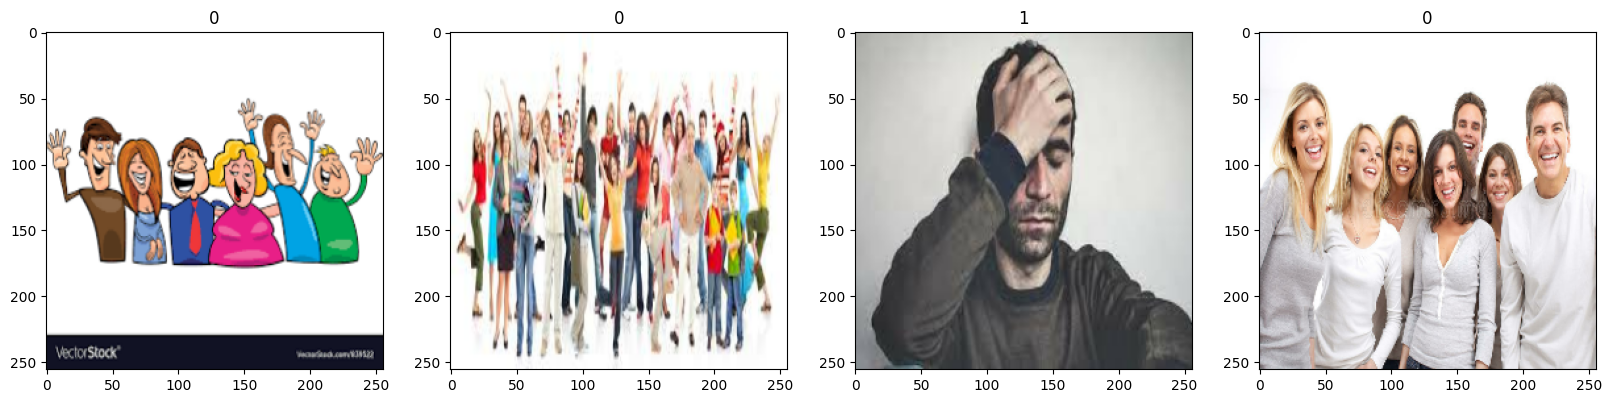

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size

7

In [45]:
test_size

1

In [46]:
val_size

2

In [47]:
len(data)

10

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [49]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [51]:
model = Sequential()

In [52]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20




7/7 [==============================] - 10s 1s/step - loss: 0.7473 - accuracy: 0.5714 - val_loss: 0.6760 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 6s 635ms/step - loss: 0.6691 - accuracy: 0.6116 - val_loss: 0.6218 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 7s 852ms/step - loss: 0.5946 - accuracy: 0.7768 - val_loss: 0.5427 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 6s 732ms/step - loss: 0.5198 - accuracy: 0.7545 - val_loss: 0.4773 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 8s 890ms/step - loss: 0.4007 - accuracy: 0.8348 - val_loss: 0.2991 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 8s 901ms/step - loss: 0.2852 - accuracy: 0.8929 - val_loss: 0.2758 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 8s 904ms/step - loss: 0.2466 - accuracy: 0.9107 - val_loss: 0.3543 - val_accuracy: 0.7812
Epoch 8/20
7/7 [================

# 8. Plot Performance

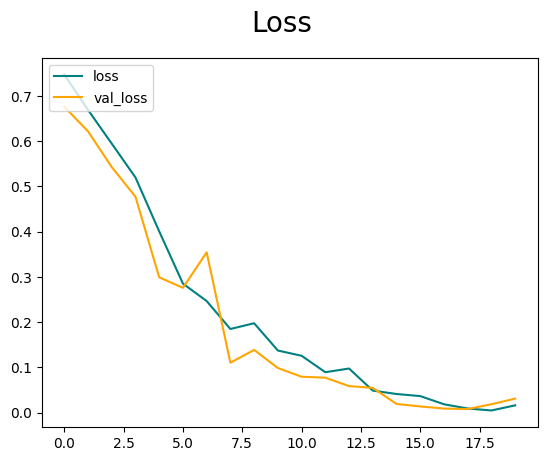

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

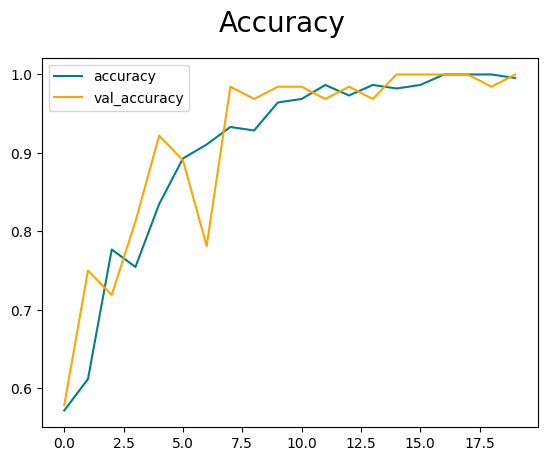

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 340ms/step


In [63]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8333333, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


In [64]:
print(f'Presision:{pre.result().numpy()},recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Presision:0.8333333134651184,recall:1.0,Accuracy:0.9411764740943909


# 10. Test

In [65]:
import cv2

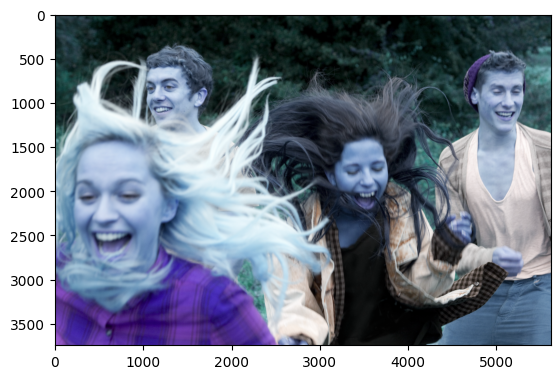

In [66]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

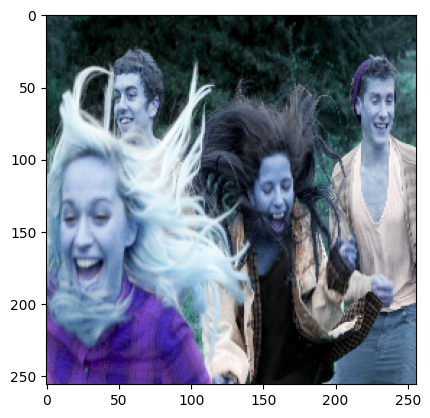

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


In [69]:
yhat

array([[0.9984018]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save(os.path.join('imageclassifier.h5'))

c:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\PROJECTS\2-ImageClassification\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
new_model = load_model(os.path.join('imageclassifier.h5'))

In [74]:
new_model

In [75]:
yhatnew= new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 137ms/step


In [76]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
